# Auto Regressive & Moving Average

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('default')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Figure size 2000x2000 with 0 Axes>

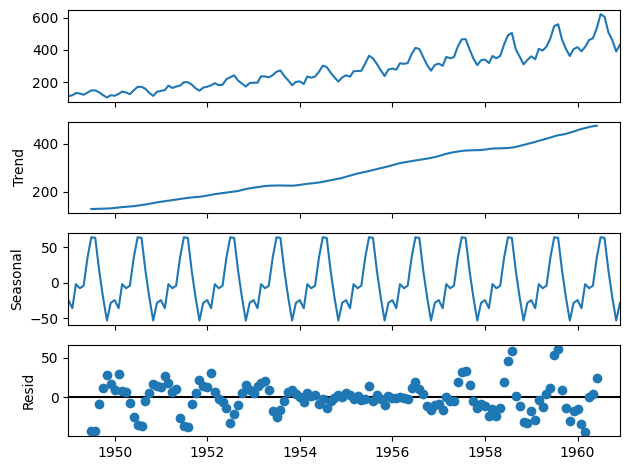

In [9]:
result = seasonal_decompose(data, model='additive', period=12)
plt. figure(figsize=(20, 20), dpi=100)
result. plot()
plt. show()

In [10]:
#data = data['#Passengers'].to_frame()

# Calculate 12-day Simple Moving Average (SMA)
data['SMA12'] = data['#Passengers'].rolling(12).mean()

data.dropna(inplace=True)
data

,#Passengers,SMA12
Month,,
1949-12-01,118,126.666667
1950-01-01,115,126.916667
1950-02-01,126,127.583333
1950-03-01,141,128.333333
1950-04-01,135,128.833333
...,...,...
1960-08-01,606,463.333333
1960-09-01,508,467.083333
1960-10-01,461,471.583333


In [11]:
passenger_data = np.array([125, 145, 186, 131, 151, 192, 137, 157, 198, 143, 163, 204])
window_size = 3
moving_average = np.convolve(passenger_data, np.ones(window_size), 'valid') / window_size
print("Original Data:", passenger_data)
print("Moving Average:", moving_average)

Original Data: [125 145 186 131 151 192 137 157 198 143 163 204]
Moving Average: [152. 154. 156. 158. 160. 162. 164. 166. 168. 170.]


In [12]:
from scipy.ndimage import uniform_filter1d

# Create a sample array
new_array = np.array([125, 145, 186, 131, 151, 192, 137, 157, 198, 143, 163, 204])

# Calculate the moving average with a window size of 3
moving_average = uniform_filter1d(new_array, size=3)

print(moving_average)

[131 152 154 156 158 160 162 164 166 168 170 190]


In [13]:
passenger_data = np.array([125, 145, 186, 131, 151, 192, 137, 157, 198, 143, 163, 204])
pd.DataFrame(passenger_data).rolling(3).mean()

,0
0,NaN
1,NaN
2,152.0
3,154.0
4,156.0
5,158.0
6,160.0
7,162.0
8,164.0
9,166.0


<Axes: xlabel='Month'>

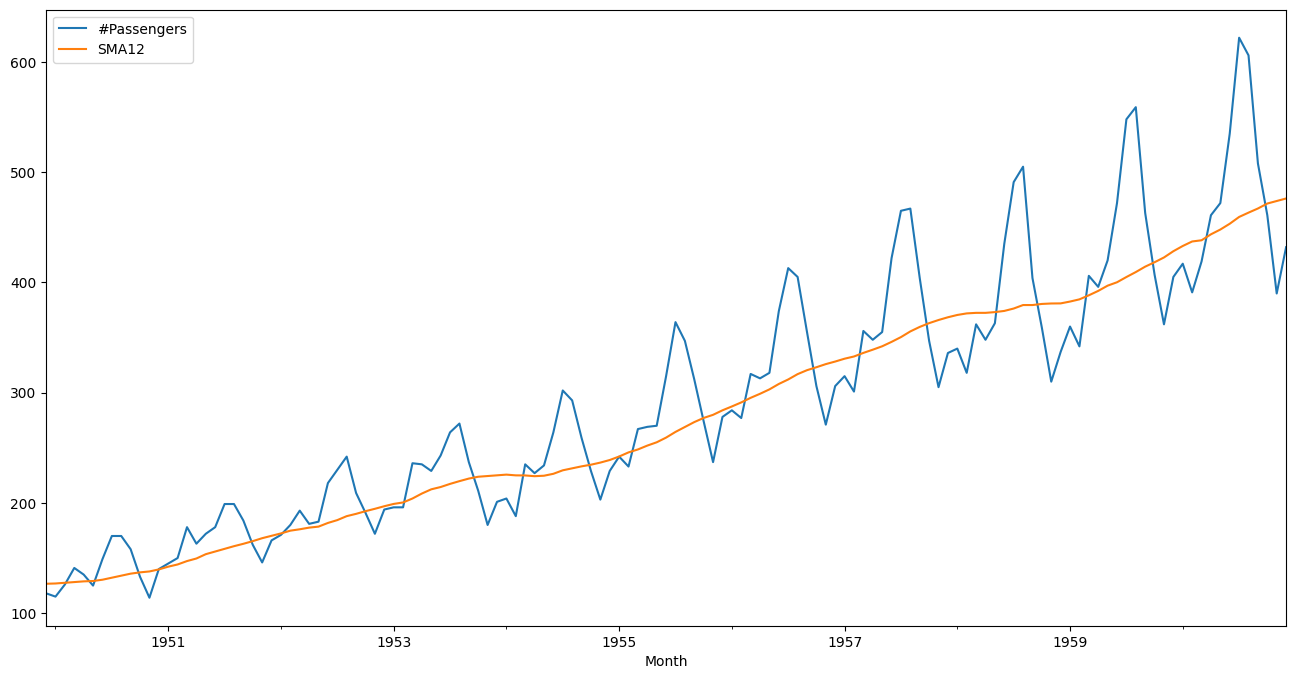

In [14]:
# plotting Close price and simple
# moving average of 30 days using .plot() method
data[['#Passengers', 'SMA12']].plot(label='Data', 
								figsize=(16, 8))

In [15]:
pd.DataFrame(data).rolling(3).mean()

,#Passengers,SMA12
Month,,
1949-12-01,NaN,NaN
1950-01-01,NaN,NaN
1950-02-01,119.666667,127.055556
1950-03-01,127.333333,127.611111
1950-04-01,134.000000,128.250000
...,...,...
1960-08-01,587.666667,458.666667
1960-09-01,578.666667,463.277778
1960-10-01,525.000000,467.333333


# ARMA & ARIMA

In [16]:
data = pd.read_csv("AirPassengers.csv", index_col='Month', parse_dates=True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


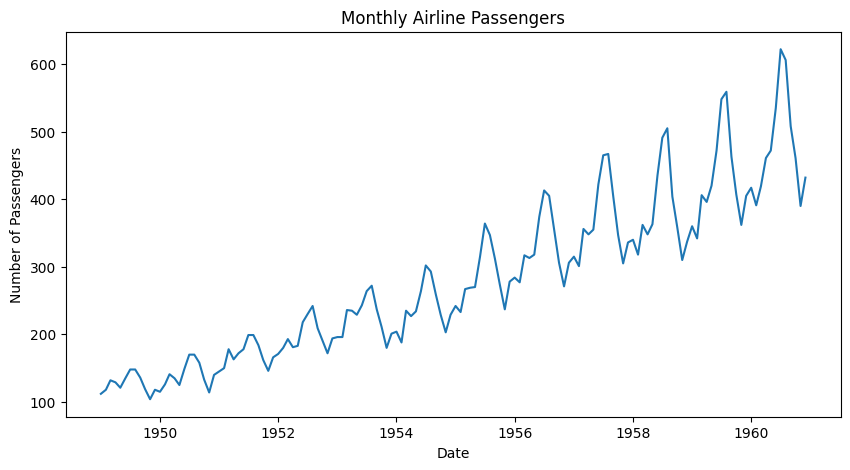

In [17]:
# Plot the dataset
plt.figure(figsize=(10, 5))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641
ADF Statistic: -2.8292668241699923
p-value: 0.054213290283826474


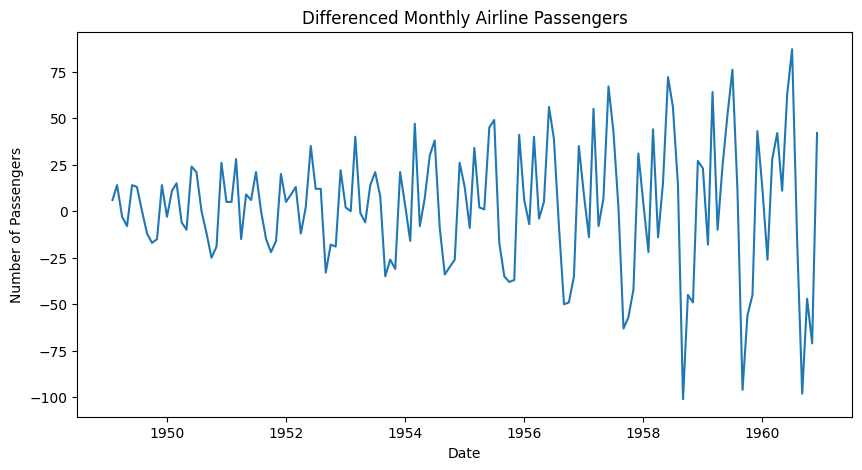

In [18]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
data_diff = data.diff().dropna()

# Check for stationarity again
result = adfuller(data_diff['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(data_diff)
plt.title('Differenced Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [19]:
train_len = int(0.8 * len(data_diff))
arma_train = data_diff[:train_len]
arma_test = data_diff[train_len:]

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARMA(1, 1) model
model = ARIMA(arma_train, order=(12, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  114
Model:                ARIMA(12, 0, 1)   Log Likelihood                -420.774
Date:                Tue, 23 Jul 2024   AIC                            871.548
Time:                        10:03:20   BIC                            912.591
Sample:                    02-01-1949   HQIC                           888.205
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3860      0.430      5.545      0.000       1.543       3.229
ar.L1         -0.0401      0.135     -0.297      0.767      -0.305       0.225
ar.L2         -0.2005      0.083     -2.424      0.0

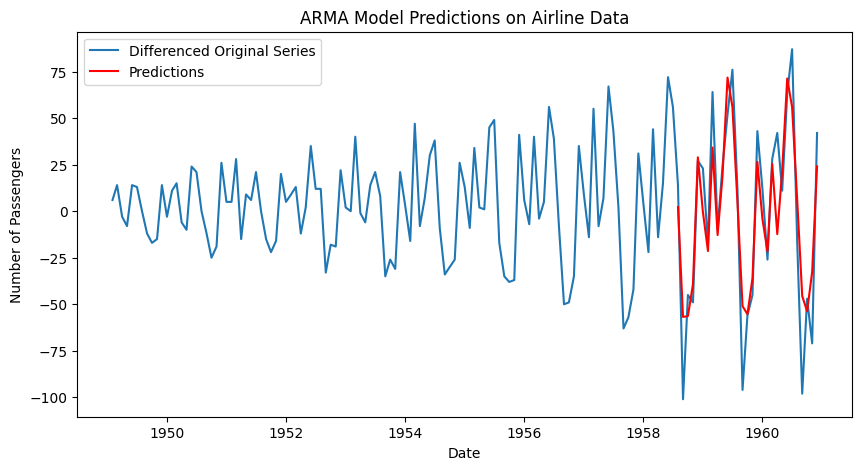

In [21]:
# Make predictions
start = len(arma_train)
end = len(arma_train) + len(arma_test) -1
predictions = model_fit.predict(start=start, end=end)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data_diff, label='Differenced Original Series')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [22]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(arma_test, predictions), mean_squared_error(arma_test, predictions), mean_absolute_error(arma_test, predictions)

(0.793164331994833, 569.0474703285458, 18.171871025098675)

In [23]:
train_len = int(0.8 * len(data))
arima_train = data[:train_len]
arima_test =data[train_len:]

In [24]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA(1, 1, 1) model
model = ARIMA(arima_train, order=(17, 2, 14))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  115
Model:               ARIMA(17, 2, 14)   Log Likelihood                -413.618
Date:                Tue, 23 Jul 2024   AIC                            891.237
Time:                        10:49:50   BIC                            978.513
Sample:                    01-01-1949   HQIC                           926.653
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8442      0.780     -1.082      0.279      -2.374       0.685
ar.L2         -0.4806      0.633     -0.759      0.448      -1.722       0.760
ar.L3         -0.4662      0.487     -0.958      0.3

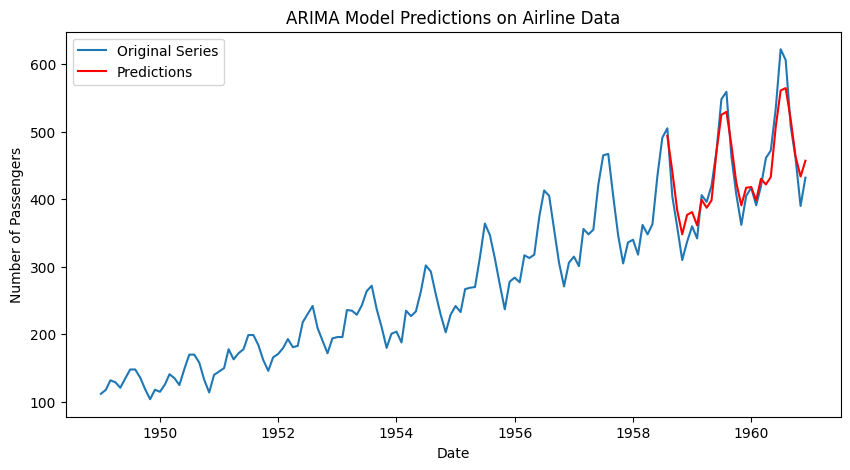

In [38]:
# Make predictions
start = train_len
end = len(data)-1
arima_predictions = model_fit.predict(start=start, end=end)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data, label='Original Series')
plt.plot(arima_predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARIMA Model Predictions on Airline Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(arima_test, arima_predictions), mean_squared_error(arima_test, arima_predictions), mean_absolute_error(arima_test, arima_predictions)

(0.8781575735906395, 743.7858605526534, 22.95190051913557)